In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape

(3999, 12)

In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000




lets start clustering using various algos

## Hierarchical clustering

lets make dendrogramm

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


df1=(df.iloc[:,1:])
df1n = norm_func(df1.iloc[:,1:])


In [9]:
df1n

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


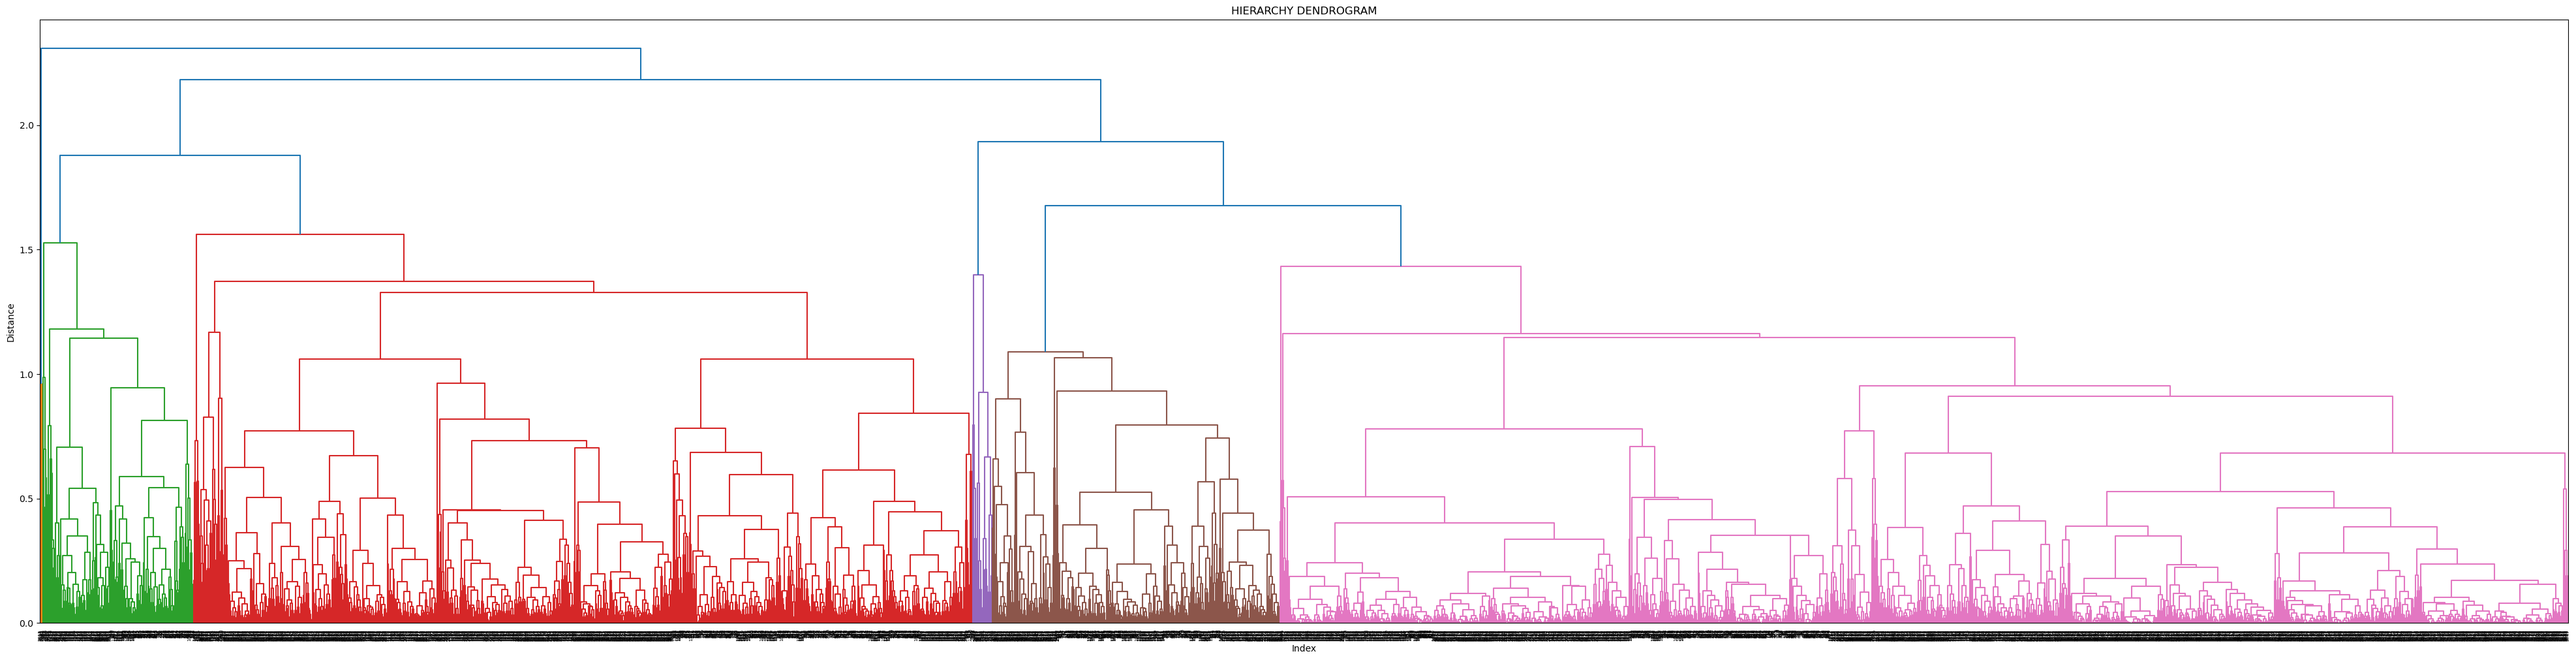

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(50,12));plt.title('HIERARCHY DENDROGRAM');plt.xlabel('Index');plt.ylabel('Distance')
dendograms=sch.dendrogram(sch.linkage(df1n,"complete"))
plt.show()

this can be 3, from 2nd linkage from above

lets try 3 and get its score

In [22]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [23]:
hac

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [24]:
label = hac.fit_predict(df1n)

In [25]:
label

array([0, 0, 0, ..., 2, 0, 0])

In [26]:
df1['Label']=label

In [27]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [28]:
df1.sort_values('Label')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2494,142152,0,3,1,1,19464,13,0,0,3088,0,0
2495,12713,0,1,1,1,0,0,0,0,3077,0,0
2496,28848,0,1,1,1,0,0,0,0,3069,0,0
2497,10940,0,1,1,1,0,0,0,0,3062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1042,98213,0,5,1,1,68013,29,0,0,5755,1,2
1043,9430,0,3,1,1,11323,13,0,0,5756,1,2
2570,10307,0,1,1,1,0,0,0,0,2808,1,2
2567,6345,0,2,1,1,7719,18,0,0,2805,1,2


In [29]:
df1.groupby('Label').mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Label,,,,,,,,,,,
0,59793.877575,87.790412,1.703645,1.018621,1.008716,10269.185024,9.182647,229.712361,0.669176,3822.941363,0.002377
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,97133.898029,240.205982,2.668933,1.007478,1.018355,28810.523453,15.596193,802.263086,2.452073,4631.008838,1.000000


#### Cluster Size and Balance:
Cluster 1 has the largest average 'Balance' and 'Bonus_miles,' indicating that it may contain high-value customers with substantial account balances and bonus miles.
Cluster 0 and Cluster 2 have lower average 'Balance' and 'Bonus_miles' compared to Cluster 1.

#### Qualification Miles and Miles Earned:
Cluster 1 has significantly higher 'Qual_miles' compared to Clusters 0 and 2, suggesting that customers in this cluster might have a high level of qualification miles.
'cc1_miles,' 'cc2_miles,' and 'cc3_miles' don't seem to exhibit strong differences between clusters, as their average values are relatively similar across clusters.

#### Flight Activity:
Cluster 1 has a notably higher 'Flight_miles_12mo' and 'Flight_trans_12' compared to Clusters 0 and 2, indicating that customers in Cluster 1 have a higher level of flight activity in the past 12 months.
#### Days Since Enrollment:
Cluster 1 has a relatively lower 'Days_since_enroll' compared to the other clusters, suggesting that customers in this cluster may have enrolled more recently.

## KMeans

In [30]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


for optimal number of clusters we have to plot a elbow curve

In [69]:
from sklearn.cluster import KMeans

aa = []
for i in range(1,18):
    km = KMeans(n_clusters=i)
    km.fit(df1)
    aa.append(km.inertia_)

In [70]:
aa

[42961820051748.85,
 20823632646467.96,
 11790024795333.504,
 7549630965403.454,
 5724519509638.136,
 4541450677769.555,
 3697370700843.3213,
 3271848719341.113,
 2897543955668.959,
 2622644984590.001,
 2377962974687.371,
 2165933680794.2097,
 1971797057885.6309,
 1830948205496.4526,
 1723012951974.273,
 1588671907466.387,
 1479953188572.3994]

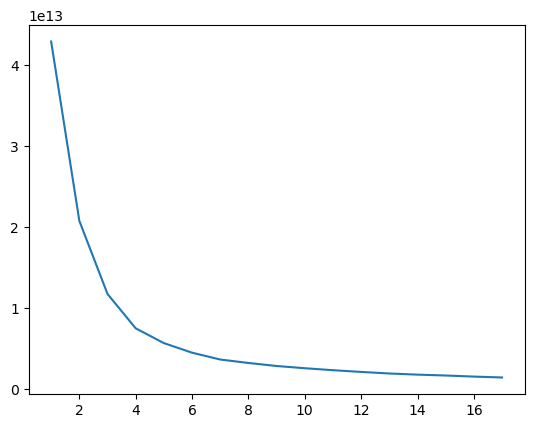

In [71]:
plt.plot(range(1,18),aa)

the optimal number of clusters can be 7 from the graph above

In [72]:
km = KMeans(n_clusters = 7)
label_km = km.fit_predict(df1)

In [73]:
df1['Label_km']=label_km

In [74]:
df1['Label_km'].unique()

array([0, 2, 6, 1, 3, 4, 5], dtype=int32)

In [75]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label,Label_km
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,6
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,6
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,6


In [76]:
mean = df1.groupby('Label_km').mean()
mean = mean.drop('Label', axis=1)

In [77]:
mean

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Label_km,,,,,,,,,,,
0,1.948167e+04,90.104995,1.365443,1.017839,1.000000,5926.530071,7.603976,213.673293,0.672273,3603.040265,0.286952
1,3.979895e+05,451.182927,3.182927,1.036585,1.000000,48785.756098,19.304878,1560.865854,4.780488,5879.012195,0.719512
2,1.268124e+05,227.761499,3.027257,1.013629,1.044293,32899.628620,16.601363,787.913118,2.304940,4733.216354,0.461670
3,2.220802e+05,309.480620,2.922481,1.000000,1.000000,34623.406977,18.077519,1086.887597,3.124031,5110.360465,0.507752
4,7.283600e+05,258.636364,3.500000,1.000000,1.136364,62470.818182,22.000000,1600.909091,5.727273,6189.681818,0.863636
5,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000
6,6.396074e+04,125.262235,2.468144,1.011080,1.018467,21347.356417,13.737765,462.262235,1.329640,4290.602955,0.400739


In [81]:
df1['Label_km'].value_counts()

0    1962
6    1083
2     587
3     258
1      82
4      22
5       5
Name: Label_km, dtype: int64

#### Cluster Size and Balance (Column: Balance):
Cluster 5 has the highest average 'Balance' among all clusters, indicating that it may contain customers with the highest account balances. This cluster might represent high-value customers.
Cluster 1 and Cluster 4 also have relatively high average balances compared to other clusters.
Cluster 0, Cluster 2, and Cluster 3 have lower average balances.

#### Qualification Miles (Column: Qual_miles):
Cluster 5 has the highest average 'Qual_miles,' suggesting that customers in this cluster have accumulated the highest qualification miles on average.
Cluster 1 and Cluster 4 also have relatively high average qualification miles.
Cluster 0, Cluster 2, and Cluster 3 have lower average qualification miles.

#### Miles Earned (Columns: cc1_miles, cc2_miles, cc3_miles):
Cluster 4 has the highest average values for 'cc1_miles' and 'cc3_miles,' indicating that customers in this cluster tend to earn more miles through their credit card (especially in categories 1 and 3).
Cluster 1 has the highest average value for 'cc2_miles.'
Clusters 0, 2, and 3 have lower average values for these columns.

#### Bonus Miles (Column: Bonus_miles):
Cluster 5 has the highest average 'Bonus_miles,' suggesting that customers in this cluster tend to earn more bonus miles on average.
Cluster 1 and Cluster 4 also have relatively high average bonus miles.
Clusters 0, 2, and 3 have lower average bonus miles.

#### Flight Activity (Columns: Bonus_trans, Flight_miles_12mo, Flight_trans_12):
Cluster 5 has the highest average values for 'Bonus_trans,' 'Flight_miles_12mo,' and 'Flight_trans_12,' indicating that customers in this cluster are more active in terms of flight-related activities and bonus transactions.
Cluster 1 and Cluster 4 also have relatively high average values for these columns.
Clusters 0, 2, and 3 have lower average values for flight-related activity and bonus transactions.

#### Days Since Enrollment (Column: Days_since_enroll):
Cluster 5 has the highest average 'Days_since_enroll,' suggesting that customers in this cluster have been enrolled for the longest period on average.
Cluster 1 and Cluster 4 also have relatively high average days since enrollment.
Clusters 0, 2, and 3 have lower average days since enrollment.

#### Award Status (Column: Award?):
Cluster 4 has the highest average 'Award?' value, indicating that customers in this cluster are more likely to receive awards on average.
Cluster 5 and Cluster 1 also have relatively high average 'Award?' values.
Clusters 0, 2, and 3 have lower average 'Award?' values.


## DBSCAN

In [92]:
df1 = df1.drop('Label',axis=1)


In [94]:
ds = df1.drop('Label_km',axis=1)

In [95]:
ds

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [103]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler().fit(ds)
da = stscaler.transform(ds)

In [120]:
db = DBSCAN(eps=1, min_samples=7)
lab = db.fit_predict(da)

In [121]:
ds['label'] = lab

In [122]:
ds['label'].unique()

array([ 0,  1, -1,  2,  3,  4])

In [123]:
ds.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [126]:
ds['label'].value_counts()

 0    2299
 1    1072
-1     604
 2      11
 4       8
 3       5
Name: label, dtype: int64